# Operator splitting 

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm
import importlib
from IPython.display import HTML
importlib.reload(nm)

<module 'nm_lib.nm_lib' from '/home/astronih/Documents/nm_lib/nm_lib/nm_lib.py'>

## 1- OS precision

Solve the following Burgers' equation: 

$$\frac{\partial u}{\partial t} = - a \frac{\partial u}{\partial x} - b \frac{\partial u}{\partial x}   \tag{1}$$

following exersize [2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb). where $x[x_0, x_f]$ with $x_0 = −2.6$, $x_f = 2.6$, $a=-0.7$ and $b=-0.3$, periodic boundary conditions and with initial condition:

$$u(x,t=t_0) = \cos^2 \left(\frac{6 \pi x}{5} \right) / \cosh(5x^2)  \tag{2}$$

Solve the evolution for the following four different approaches: 

- 1 With additive OS.  

- 2 With Lie-Trotter OS. 

- 3 With Strang OS.

- 4 Without an operator splitting and single time-step method but add the to terms: 

$$\frac{\partial u}{\partial t} = - (a+b) \frac{\partial u}{\partial x}$$

for $nump=256$ and 100 steps.

_Suggestion_: use the Lax-method scheme for all cases with `deriv_cent`. Make sure the boundaries are properly selected.

Fill in the function `osp_LL_Add`, `osp_LL_Lie`, and `osp_LL_Strang`.

Start with $cfl\_cut = 0.4$ and increase up to $0.9$.  

Which OS schemes are stable? Which one is more diffusive? Why?

In [26]:

def u_init(x):
    """
    The initial function at t=t0

    Parameters
    ----------
    x   :   `array`
         Spatial axis
    
    Returns
    -------
    `array`
        The initial function at t=t0
    """
    ans = (np.cos(6*np.pi*x/5))**2 / np.cosh(5*x**2)
    return ans

def u(x, t, a=-1):
    """
    Analytical solution to the equation
    
    Requires
    --------
    u_init function

    Parameters
    -----------
    x   :   `array`
         Spatial axis
    t   :   `array`
         Time axis
    a : `float` or `array`
        Either constant, or array which multiply the right hand side of the Burger's eq.
        
    Returns
    -------
    `array`
        Analytical solution to burgers equations
    """
    X = (x - a*t)
    L = x[-1] - x[0]
    new_X = (X + L/2)%L - L/2
    ans = u_init(new_X)
    return ans
    
def spatial_domain(nump, x0=-2/6, xf=2.6):
    ans = np.arange(nump)/(nump - 1) * (xf - x0) + x0
    return ans

In [35]:

nump = 256
xx = spatial_domain(nump)
nt = 100
U0 = u_init(xx)
t, ut = nm.ops_Lax_LL_Lie(xx, U0, nt, a=-0.7, b=-0.3, cfl_cut=0.4)

U = u(np.repeat(xx[:, np.newaxis], nt, axis=1), 
    np.repeat(t[np.newaxis, :], nump, axis=0), a=-1)

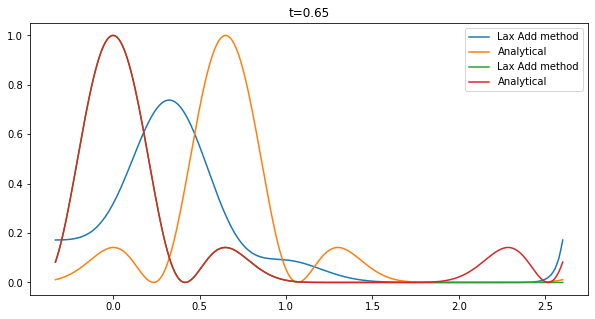

In [36]:
anim = nm.animation(xx, ut, U, nt, t, label_1='Lax Add method')
HTML(anim.to_jshtml())

## 2- When does it not work? 

Use OS-Strang from the previous exercise and try to apply a predictor-corrector explicit method. 
To facilitate this exercise, `nm_lib` already includes the predictor-corrector Hyman method, which is included Bifrost (`Hyman`). Fill in the function `osp_Lax_LH_Strang`. Use the same setup as the previous exercise but with $nump=512$, $500$ steps, and $cfl\_cut=0.8$. 

What do you notice? 

__Optional__: Apply the Hyman predictor-corrector explicit method to the Burgers equation and check if the following is true: 

$$u^{n+1} = F\, u^{n}\Delta t \approx G\, u^{n}\Delta t+H\, u^{n}\Delta t$$